In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
%matplotlib inline

In [3]:
data=pd.read_csv("emails.csv")

In [4]:
#Group by to see how many spam and ham
data.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : grades  pam ,  another group :  ...    2
1     1368   1368  Subject: clear benefits of creative design  lt...    1

In [13]:
# Let's get the length of the each messages and adding length column
data['length']=data['text'].apply(len)

In [14]:
data['length'].head()

0    1484
1     598
2     448
3     500
4     235
Name: length, dtype: int64

In [16]:
data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [5]:
# Let's divide the messages into spam and ham
ham=data[data['spam']==0]
spam=data[data['spam']==1]

In [7]:
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [8]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
print("Spam percentage=",(len(spam)/len(data))*100,"%")
print("Ham percentage=",(len(ham)/len(data))*100,"%")

Spam percentage= 23.88268156424581 %
Ham percentage= 76.11731843575419 %


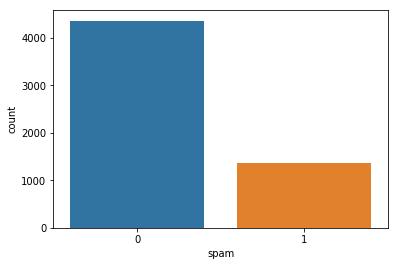

In [10]:
#Visualization of Spam=1 and Ham=0
sns.countplot(data['spam'],label="count")

In [14]:
#Removing Stopwords
#Stopwords are the English words which does not add much meaning to a sentence. 
#They can safely be ignored without sacrificing the meaning of the sentence. 
#For example, the words like the, he, have etc. 
#Such words are already captured this in corpus named corpus.
from nltk.corpus import stopwords

In [15]:
#CountVectorizer 
#CountVectorizer we are converting raw text to a numerical vector representation of words and 
#n-grams. This makes it easy to directly use this representation as features (signals) in 
#Machine Learning tasks such as for text classification and clustering.
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#remove punctuation , join and remove stopwords
def message_clean(message):
    Remove_punc=[char for char in message if char not in string.punctuation]
    #join after punctuation is removed
    Remove_pun_join=''.join(Remove_punc)
    #Remove Stopwords
    Remove_stopwords=[word for word in Remove_pun_join.split() if word.lower() not in stopwords.words('english')]
    return Remove_stopwords

In [19]:
#Add function to all message
spam_clean=data['text'].apply(message_clean)

In [21]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [22]:
print(data['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [23]:
#APPLY vectorizer for all message
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=message_clean)
spamham_countvectorizer = vectorizer.fit_transform(data['text'])

In [25]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


### Training Dataset
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = data['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

In [27]:
#testing
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [84]:
#as seen 1 is spam and 0 is ham

In [28]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1], dtype=int64)

In [ ]:
#as seen 0 is ham and 1 is spam

In [88]:
#Dividing data in to train and test split

In [30]:
x=spamham_countvectorizer
y=label

In [31]:
x.shape

(5728, 37229)

In [32]:
y.shape

(5728,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
NB_classifier.score(X_test,y_test)

0.987783595113438

In [36]:
#Confusion Matrix
#A confusion matrix is a table that is often used to describe the performance of a 
#classification model (or “classifier”) on a set of test data for which the true values are known. 
#It allows the visualization of the performance of an algorithm.

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train=NB_classifier.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
cm=confusion_matrix(y_train,y_pred_train)

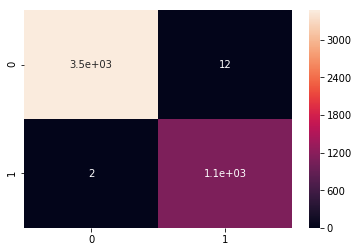

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
#predicting test results
y_pred_test=NB_classifier.predict(X_test)

In [41]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [42]:
cn=confusion_matrix(y_test,y_pred_test)

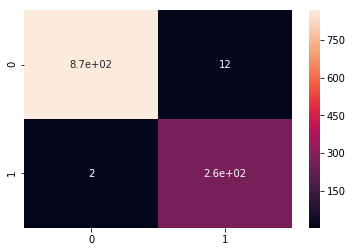

In [43]:
sns.heatmap(cn,annot=True)